In [720]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

*Leitura do dataset.*

In [721]:
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


*Entendendo o dataset.*

In [722]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


*Alterando as variáveis categóricas em números inteiros.*

In [723]:
label_encoder = LabelEncoder()
df['mainroad']= label_encoder.fit_transform(df['mainroad'])
df['guestroom']= label_encoder.fit_transform(df['guestroom'])
df['basement']= label_encoder.fit_transform(df['basement'])
df['hotwaterheating']= label_encoder.fit_transform(df['hotwaterheating'])
df['airconditioning']= label_encoder.fit_transform(df['airconditioning'])
df['prefarea']= label_encoder.fit_transform(df['prefarea'])
df['furnishingstatus']= label_encoder.fit_transform(df['furnishingstatus'])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


*Calculando a correlação entre as colunas.*

In [724]:
df.corr()   

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,-0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,-0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.150477


*Visualização da correlação em um mapa de calor.*

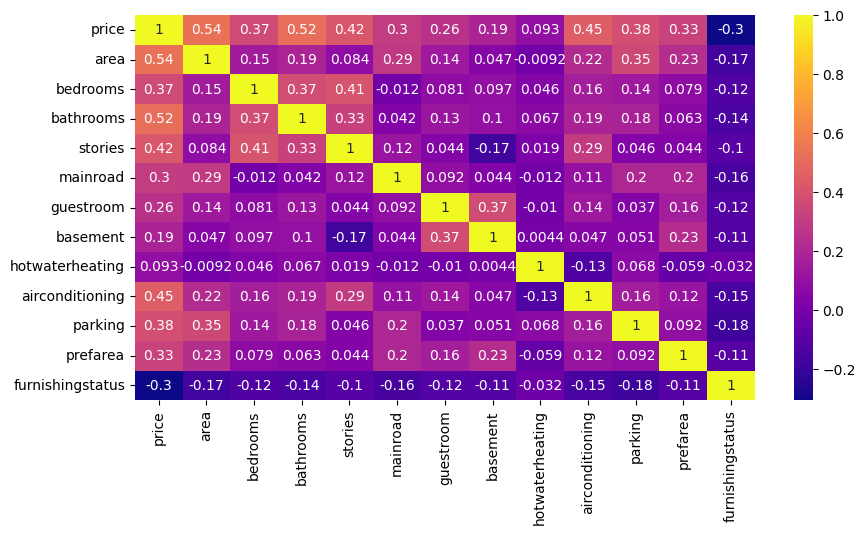

In [725]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(),annot=True,cmap='plasma')
plt.show()


*Variável preditora = area /
Variável alvo = price*

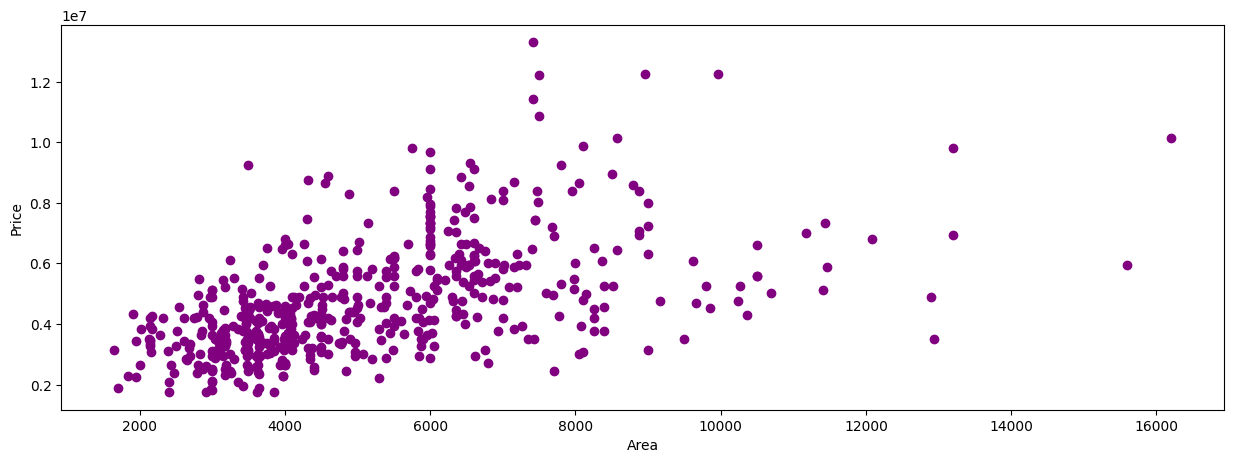

In [726]:
plt.figure(figsize = (15,5))
plt.scatter(df['area'],df['price'], c='purple')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

In [727]:
x = df[['area']]
y = df[['price']]


*Criando e treinando o modelo.*

In [728]:
modelo = LinearRegression()
modelo.fit(x,y)

LinearRegression()

In [729]:
treinamento = modelo.predict(x)

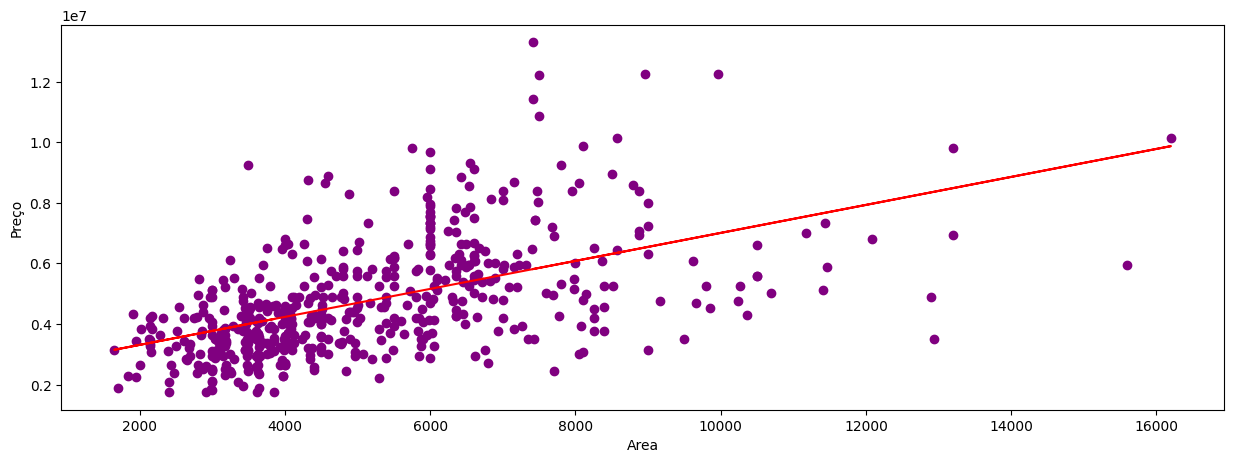

In [730]:
plt.figure(figsize = (15,5))
plt.scatter(df['area'],df['price'],c='purple')
plt.plot(df['area'],treinamento,c='red')
plt.xlabel("Area")
plt.ylabel("Preço")
plt.show()

*Avaliando a precisão do modelo.*

In [731]:
x = sm.add_constant(x)
rgo = sm.OLS(y, x)
rgot = rgo.fit()
print(rgot.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     218.9
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           7.39e-42
Time:                        18:03:40   Log-Likelihood:                -8551.2
No. Observations:                 545   AIC:                         1.711e+04
Df Residuals:                     543   BIC:                         1.712e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.387e+06   1.74e+05     13.681      0.0